# Homework
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

## Preparing the dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')

# filtering the dataset
filtered_df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

# desired columns
desired_columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 
                   'total_bedrooms', 'population', 'households', 'median_income', 
                   'median_house_value']
df = filtered_df[desired_columns]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Question 1 - There's one feature with missing values. What is it?

In [3]:
# missing values

missing_values = df.isnull().sum()
missing_values

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2 - What's the median (50% percentile) for variable 'population'?

In [4]:
# median of population
population_median = df['population'].median()
population_median

1195.0

# Preparing and splitting the dataset

In [5]:
# use seed 42
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


print("Number of samples in train set:", len(df_train))
print("Number of samples in validation set:", len(df_val))
print("Number of samples in test set:", len(df_test))

Number of samples in train set: 9413
Number of samples in validation set: 3137
Number of samples in test set: 3137


# Question 3 - Which option gives better RMSE?

In [6]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Linear Regression

In [7]:
# We need to deal with missing values for the column from Q1.
def prepare_X_zeros(df):
    df_with_0 = df.fillna(0)
    X = df_with_0.values
    return X


In [8]:
# train a linear regression model without regularization using the code from the lessons.
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [9]:
# Train linear regression with null values filled with 0s
X_train = prepare_X_zeros(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [10]:
y_pred = w_0 + X_train.dot(w)

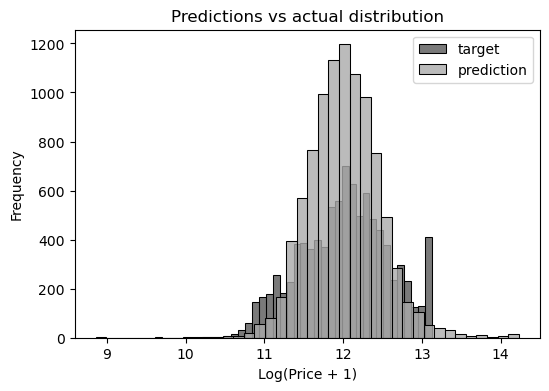

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [12]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [13]:
# rmse zero predictions
rmse(y_train, y_pred)

0.3402719715829534

In [14]:
# Train linear regression with null values filled with mean
def prepare_X_mean(df):
    
    df_with_mean = df.fillna(df.mean())
    X = df_with_mean.values
    return X

In [15]:
# Train linear regression with null values filled with mean value
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [16]:
# Predictions
y_mean = w_0 + X_train.dot(w)

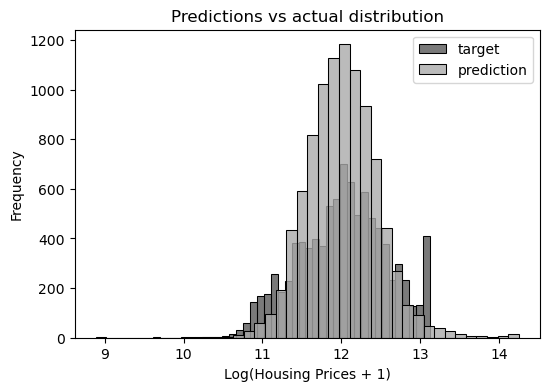

In [17]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Housing Prices + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [18]:
rmse(y_train, y_mean)

0.340030082226426

# Question 4 - Regularization

In [19]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Try different values of r from: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [26]:
X_train = prepare_X_zeros(df_train)
X_val = prepare_X_zeros(df_val)

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [28]:
r = 0

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.3402719715829534
val 0.3408479034201643


In [29]:
r = 0.000001

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.3402719715829849
val 0.340847906183037


In [30]:
r = 0.0001

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.34027197189765424
val 0.3408481800532384


In [31]:
r = 0.001

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.34027200293364984
val 0.34085069219124486


In [32]:
r = 0.01

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.3402749908964322
val 0.3408779300469964


In [33]:
r = 0.1

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.34048643951065993
val 0.34128620419947425


In [35]:
r = 1

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.34350313673468913
val 0.34489583276302355


In [36]:
r = 5

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.3461012352738013
val 0.3477398070480636


In [37]:
r = 10

w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.34663477204828363
val 0.3483149833520889


# Question 5 - What's the value of std?

In [43]:
def prepare_X_zeros(df):
    df_with_0 = df.fillna(0)
    X = df_with_0.values
    return X

def get_rmse(seed):
        
    df = pd.read_csv('housing.csv')

    # filtering the dataset
    filtered_df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

    # desired columns
    desired_columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 
                       'total_bedrooms', 'population', 'households', 'median_income', 
                       'median_house_value']
    
    df = filtered_df[desired_columns]
    
    np.random.seed(seed)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X_zeros(df_train)
    
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X_zeros(df_val)
    y_pred = w_0 + X_val.dot(w)

    return rmse(y_val, y_pred)


rmse_values = []

for seed in range(0, 10):    
    rmse_value = get_rmse(seed)
    print(f'seed: {seed}. rmse_value: {rmse_value}')
    rmse_values.append(rmse_value)

std_rmse = np.std(rmse_values)


print("Standard deviation of RMSE:", round(std_rmse, 3))

seed: 0. rmse_value: 0.33773871601241534
seed: 1. rmse_value: 0.33779993536620034
seed: 2. rmse_value: 0.3384287006770243
seed: 3. rmse_value: 0.3320049468307805
seed: 4. rmse_value: 0.33944518625569475
seed: 5. rmse_value: 0.3433819705265852
seed: 6. rmse_value: 0.3385330211770784
seed: 7. rmse_value: 0.34687476973049747
seed: 8. rmse_value: 0.35127368659561153
seed: 9. rmse_value: 0.3341558266517612
Standard deviation of RMSE: 0.005


# Question 6 - What's the RMSE on the test dataset?

In [44]:
def prepare_X_zeros(df):
    df_with_0 = df.fillna(0)
    X = df_with_0.values
    return X

        
df = pd.read_csv('housing.csv')

# filtering the dataset
filtered_df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

# desired columns
desired_columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 
                   'total_bedrooms', 'population', 'households', 'median_income', 
                   'median_house_value']

df = filtered_df[desired_columns]

np.random.seed(9)
n = len(df)

n_test = int(0.2 * n)
n_train_and_val = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train_and_val = df_shuffled.iloc[:n_train_and_val].copy()
df_test = df_shuffled.iloc[n_train_and_val:].copy()

y_train_and_val = np.log1p(df_train_and_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train_and_val['median_house_value']
del df_test['median_house_value']

X_train_and_val = prepare_X_zeros(df_train_and_val)
    
w_0, w = train_linear_regression_reg(X_train_and_val, y_train_and_val, r=0.001)

X_test = prepare_X_zeros(df_test)
y_pred = w_0 + X_test.dot(w)

print("Test RMSE:", rmse(y_test, y_pred))

Test RMSE: 0.3349899336608947
